# Invariant and Long-Run Distributions of a Discrete Time Markov Chain

We will examine a particular case of a stochastic matrix **P**, particularly one that is irreducible, aperiodic, and positive recurrent. First, we will look at an example to provide some meaning behind our simulation:

Let
\begin{equation}
{\bf P = }
  \begin{bmatrix}
    1/3 & 1/2 & 1/6 & 0  \\
    1/2 & 1/8 & 1/4 & 1/8\\
    1/4 & 1/2 & 1/8 & 1/8\\
    0   &   0 & 1/2 & 1/2\\
  \end{bmatrix}
  \label{eq:aeqn}
\end{equation}

Let us label four states of this process as 0-4. We assign each state in ascending order twice, once to the rows and again to the columns. Then, we read this matrix starting from the row index to the column index. That is, for the first element, we start in row 1 (corresponding to state 0) and end in column 1 (also corresponding to state 0). The value of this element, $1/3$, is the probability of transitioning from state 0 to state 0 in what we call a single jump, and we can infer that the subsequent values in this row correspond to the probabilities of starting from state 0 and "jumping" to states 1, 2, and 3, respectively in one time jump. We may notice that the sum of each row comes out to 1 and that each value is non-negative, giving us the basis of defining a stochastic matrix. In this case, we call **P** a _transition matrix_, one that provides us with the probabilities of transitioning from one state to another.

If we were to model this process, one of the most important properties is that if we were to inspect a single jump out of say 5 jumps from one state to another, the probability of ending in a particular state only depends on the probabilities layed out in the transition matrix above that corresponds to the state that is jumping from. If our first two jumps went from state 0 to state 2, then state 2 to state 3, the probability of our third jump resulting in ending in state 2 would only be determined by the fact that we are starting this jump from state 3 and ending in state 2. Notation-wise is as follows:

$$
\mathbb{P}(X_n = X_{n-1} \mid X_{n-1} = x_{n-1},...,X_0 = x_0) = \mathbb{P}(X_n = x_n \mid X_{n-1} = x_{n-1})
$$

In this sense, the Markov property sounds like a motivational quote - _It doesn't matter how you get there, all that matters is that you've made it to where you are now_.

Other properties of our particular model include being irreducible, aperiodic, and positive recurrent. Rather than explaining every property in detail, we will hopefully be content with simply making a few comments about our Markov Chain. First, we can see that if we start in any one state, we can eventually get to any other state (including the state we are currently in) if provided with an unlimited number of jumps. Second, if we start in one state and look at all possible paths we can take to return to that same state (including just returning to that state in 1 jump), we are not stuck in some periodic loop where it takes say, two (or some multiple of two) steps to return to that same state. This is obviously not the case for our process as we can see that any single jump has some positive probability of remaining in the same state. Lastly, and this can mostly be implied from the previous two comments, at any point and any state of our process, it is always possible to return to that state in a finite number of steps. From all these properties, we are finally able to examine the purpose of our simulations.

A particular theorem of this process, taken from Professor Hohn's lecture notes, states the following:

---
_If P is aperiodic and positive recurrent then $\lim_{m\to\infty}$ $[\mathbf{P}^m]_{ij} = \pi(j)$ for all states i,j $\in$ S. Equivalently, from the perspective of transition probabilities, if_ **P** _is aperiodic and positive recurrent, then the m-step transition probability $p_{ij}^{(m)}$ from state i to state j tends to $\pi(j)$ as m tends to infinity, independent of the state i._

---
Clarifying notations, $[\mathbf{P}^m]_{ij}$ is the probability of starting in state *i* and ending in state *j* in *m* jumps, and can be calculated simply by raising **P** to the _m<sup>th</sup>_ power and reading the resulting matrix in the same manner as the original 1-step transition matrix. We can observe this by raising our matrix **P** to a high power.

In [1]:
import numpy as np
P = np.array([[1/3, 1/2, 1/6,   0],
              [1/2, 1/8, 1/4, 1/8],
              [1/4, 1/2, 1/8, 1/8],
              [  0,   0, 1/2, 1/2]])

state_space = [0,1,2,3]

print(np.linalg.matrix_power(P,100))

[[ 0.32142857  0.31428571  0.22857143  0.13571429]
 [ 0.32142857  0.31428571  0.22857143  0.13571429]
 [ 0.32142857  0.31428571  0.22857143  0.13571429]
 [ 0.32142857  0.31428571  0.22857143  0.13571429]]


Actually, we get the same result to the 8th decimal point if we were to raise this matrix to only the 28<sup>th</sup> power. To interpret this, we say that the probability of ending in states 0, 1, 2, or 3 in a significant amount of jumps, regardless of where we start, is 0.32142857, 0.31428571, 0.22857143, and 0.13571429, respectively. This is what we refer to as the invariant or stationary distribution, notated as $\pi$, and this can be solved by the equation $\pi \cdot \mathbf{P} = \pi$ (this calculation is surprisingly difficult to process in Python, so we will simply use the results we computed above). We may show through similation that these probabilities empirically hold.

One way to show the long-run probabilities of hitting each state over very long periods of time is simply to show the amount of time spent in each state. This simulation collects the amount of times each state gets a hit.

In [2]:
## performs m jumps and returns a random state determined by the Markov process
def m_jump(x_mat, s_s, j_c):
    results = np.zeros([10000,4])
    hit_counts = np.zeros([1,4], dtype=int)
    cur_state = np.random.choice(s_s, p = [.25,.25,.25,.25]) ## chooses from the list of starting states with equal prob 
    row_count = 0
    for i in range(1,100001):
        t_prob = x_mat.tolist()[cur_state] ## 1-step probabilities
        cur_state = np.random.choice(s_s, p = t_prob)
        hit_counts[0,cur_state] += 1
        if i in j_c:
            results[row_count,] = hit_counts
            row_count += 1
    return(results)

In [3]:
j_choices = np.arange(10,100001,10)

x1 = m_jump(P,state_space,j_choices)

for i in range(10000):
    x1[i,] = np.divide(x1[i,],np.repeat(j_choices[i],4))
    
print(x1)

[[ 0.6         0.1         0.3         0.        ]
 [ 0.45        0.3         0.25        0.        ]
 [ 0.33333333  0.33333333  0.3         0.03333333]
 ..., 
 [ 0.31855371  0.31585317  0.22994599  0.13564713]
 [ 0.31856186  0.31588159  0.22992299  0.13563356]
 [ 0.31855     0.31589     0.22992     0.13564   ]]


We can see that earlier in this simulation, the distributions had somewhat of a high variance, but soon each state converged toward 0.32142857, 0.31428571, 0.22857143, and 0.13571429. Putting this into a data frame and plotting the results, we can visualize this process.

In [4]:
import pandas as pd

df = pd.DataFrame({
    'n_jumps' : j_choices,
    'state_0_hits' : x1[:,0],
    'state_1_hits' : x1[:,1],
    'state_2_hits' : x1[:,2],
    'state_3_hits' : x1[:,3],
})

print(df[:10])

   n_jumps  state_0_hits  state_1_hits  state_2_hits  state_3_hits
0       10      0.600000      0.100000      0.300000      0.000000
1       20      0.450000      0.300000      0.250000      0.000000
2       30      0.333333      0.333333      0.300000      0.033333
3       40      0.375000      0.375000      0.225000      0.025000
4       50      0.300000      0.380000      0.280000      0.040000
5       60      0.316667      0.350000      0.300000      0.033333
6       70      0.314286      0.342857      0.285714      0.057143
7       80      0.312500      0.350000      0.275000      0.062500
8       90      0.300000      0.344444      0.266667      0.088889
9      100      0.300000      0.340000      0.260000      0.100000


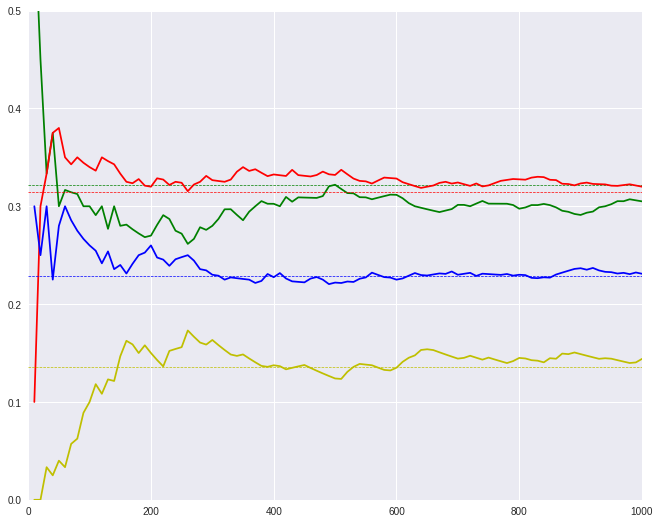

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn; seaborn.set()
figsize(11,9)
plt.ylim(0,.5)
plt.xlim(0,1000)
plt.plot(df['n_jumps'],df['state_0_hits'], 'g')
plt.axhline(y=0.32142857, color='g', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_1_hits'], 'r')
plt.axhline(y=0.31428571 , color='r', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_2_hits'], 'b')
plt.axhline(y=0.22857143, color='b', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_3_hits'], 'y')
plt.axhline(y=0.13571429, color='y', linestyle='--', lw='.7')


With the dotted lines representing the true stationary distributions, we can see that these average hit times vary around these values. Let's see what happens with a wider range of jump times.

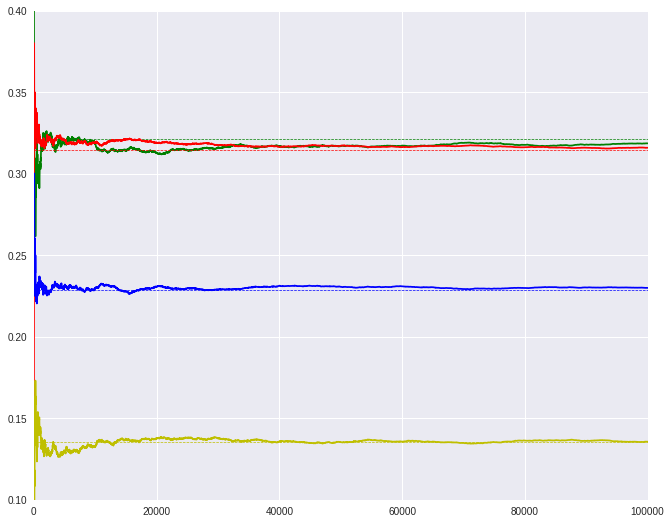

In [6]:
figsize(11,9)
plt.ylim(.1,.4)
plt.xlim(0,100000)
plt.plot(df['n_jumps'],df['state_0_hits'], 'g')
plt.axhline(y=0.32142857, color='g', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_1_hits'], 'r')
plt.axhline(y=0.31428571 , color='r', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_2_hits'], 'b')
plt.axhline(y=0.22857143, color='b', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_3_hits'], 'y')
plt.axhline(y=0.13571429, color='y', linestyle='--', lw='.7')

This plot does show that each state does seeminly converge to its respective stationary distribution, but you may think that maybe the scaling of the graph may be misleading. Let's look at the last 1,000 jumps to compare it to the same scale as the first plot.

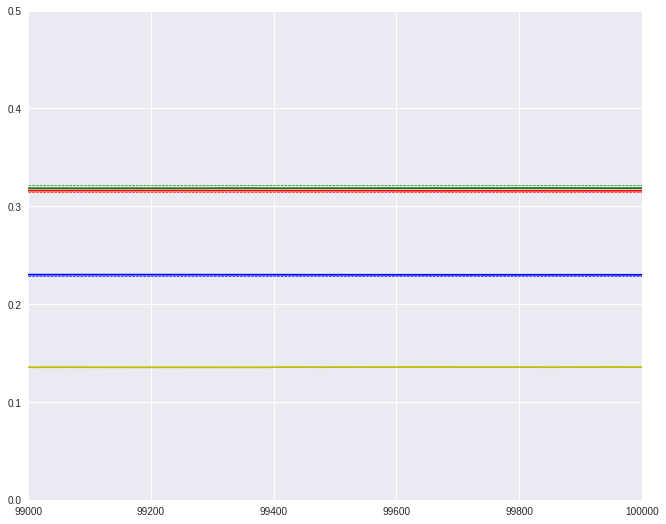

In [7]:
figsize(11,9)
plt.ylim(0,.5)
plt.xlim(99000,100000)
plt.plot(df['n_jumps'],df['state_0_hits'], 'g')
plt.axhline(y=0.32142857, color='g', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_1_hits'], 'r')
plt.axhline(y=0.31428571 , color='r', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_2_hits'], 'b')
plt.axhline(y=0.22857143, color='b', linestyle='--', lw='.7')
plt.plot(df['n_jumps'],df['state_3_hits'], 'y')
plt.axhline(y=0.13571429, color='y', linestyle='--', lw='.7')

Not bad! This experiment was simply a simulation, and some error was expected. But for any Markov Chain with the aforementioned properties, a similar simulation should have similar results.